In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
from datetime import datetime
import seaborn as sns 
import matplotlib as mpl

In [3]:
#import dataset with CT opoiod overdoes deaths
death = pd.read_csv('Accidental_Drug_Related_Deaths__2012-June_2017.csv')

In [5]:
death.head(10)

,CaseNumber,Date,Day,Month,Year,Sex,Race,Age,ResidenceCity,ResidenceState,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,15-777,NaN,0,1,1900,Male,White,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2-A,NaN,NaN,NaN,"CT\n(41.544654, -72.651713)"
1,15-16348,NaN,0,1,1900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"CT\n(41.544654, -72.651713)"
2,12-18447,12/29/2012,29,12,2012,Male,White,30.0,WOLCOTT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
3,12-14640,10/18/2012,18,10,2012,Male,White,19.0,SUDBURY,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"BRIDGEPORT, CT\n(41.179195, -73.189476)"
4,21885,5/30/2012,30,5,2012,Male,White,35.0,BRIDGEPORT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"BRIDGEPORT, CT\n(41.179195, -73.189476)"
5,20424,6/21/2012,21,6,2012,Male,White,29.0,ROCKY HILL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"HARTFORD, CT\n(41.765775, -72.673356)"
6,23346,5/24/2012,24,5,2012,Male,Black,53.0,NEW LONDON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW LONDON, CT\n(41.355167, -72.099561)"
7,12-12055,8/27/2012,27,8,2012,Male,"Hispanic, White",71.0,NEW HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,OPIATES,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
8,12-11530,8/15/2012,15,8,2012,Male,"Hispanic, White",44.0,NEW HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
9,12-13673,9/30/2012,30,9,2012,Female,"Hispanic, White",32.0,MIDDLETOWN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"MIDDLETOWN, CT\n(41.544654, -72.651713)"


In [6]:
death.describe()
list(death)

['CaseNumber',
 'Date',
 'Day',
 'Month',
 'Year',
 'Sex',
 'Race',
 'Age',
 'ResidenceCity',
 'ResidenceState',
 'ResidenceCounty',
 'DeathCity',
 'DeathState',
 'DeathCounty',
 'Location',
 'DescriptionofInjury',
 'InjuryPlace',
 'ImmediateCauseA',
 'Heroin',
 'Cocaine',
 'Fentanyl',
 'Oxycodone',
 'Oxymorphone',
 'EtOH',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Amphet',
 'Tramad',
 'Morphine (not heroin)',
 'Other',
 'Any Opioid',
 'MannerofDeath',
 'AmendedMannerofDeath',
 'DeathLoc']

In [7]:
#deleate unwanted columns and set index 
death_index = death.drop(['ResidenceState','DeathState','DescriptionofInjury','ImmediateCauseA','MannerofDeath','DeathLoc', 'DescriptionofInjury', 'AmendedMannerofDeath'], axis= 1)

In [8]:
death_index = death_index.set_index(['Date'])
death_index.head()

,CaseNumber,Day,Month,Year,Sex,Race,Age,ResidenceCity,ResidenceCounty,DeathCity,...,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid
Date,,,,,,,,,,,,,,,,,,,,,
NaN,15-777,0,1,1900,Male,White,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-A,NaN
NaN,15-16348,0,1,1900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/29/2012,12-18447,29,12,2012,Male,White,30.0,WOLCOTT,NEW HAVEN,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/18/2012,12-14640,18,10,2012,Male,White,19.0,SUDBURY,MIDDLESEX,BRIDGEPORT,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
5/30/2012,21885,30,5,2012,Male,White,35.0,BRIDGEPORT,FAIRFIELD,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#drop all years before 2011
death_index = death_index[death_index['Year'] >= 2011].drop('Other')
death_index.head()

,CaseNumber,Day,Month,Year,Sex,Race,Age,ResidenceCity,ResidenceCounty,DeathCity,...,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid
Date,,,,,,,,,,,,,,,,,,,,,
12/29/2012,12-18447,29,12,2012,Male,White,30.0,WOLCOTT,NEW HAVEN,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/18/2012,12-14640,18,10,2012,Male,White,19.0,SUDBURY,MIDDLESEX,BRIDGEPORT,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
5/30/2012,21885,30,5,2012,Male,White,35.0,BRIDGEPORT,FAIRFIELD,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/21/2012,20424,21,6,2012,Male,White,29.0,ROCKY HILL,HARTFORD,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/24/2012,23346,24,5,2012,Male,Black,53.0,NEW LONDON,NEW LONDON,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#deterime the number of deaths per year
death_year = death_index.groupby(['Year']).count()

In [11]:
print(death_year)

      CaseNumber  Day  Month  Sex  Race  Age  ResidenceCity  ResidenceCounty  \
Year                                                                           
2012         355  355    355  355   355  355            350              334   
2013         490  490    490  490   490  490            477              460   
2014         558  558    558  557   555  557            538                0   
2015         723  723    723  723   722  723            699              686   
2016         917  917    917  916   913  917            888              883   
2017         538  538    538  538   537  538            538              522   

      DeathCity  DeathCounty     ...      Oxymorphone  EtOH  Hydrocodone  \
Year                             ...                                       
2012        354          352     ...               30    61           15   
2013        490          488     ...               16    83           19   
2014        557          408     ...               29  

In [12]:
death_year = death_year.drop(['Day','Month','Sex','Race','Age','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid'], axis= 1)
death_year = death_year.drop(['Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis=1)
print(death_year)

      CaseNumber
Year            
2012         355
2013         490
2014         558
2015         723
2016         917
2017         538


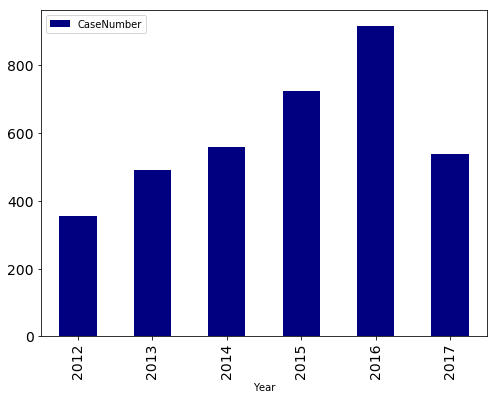

In [13]:
death_year.plot(kind='bar',
                   figsize=(8,6),
                   legend=True,
                   color=['navy'],
                   fontsize=14)
pp.show()

In [14]:
#deterime the monthes with the high deaths
death_month = death_index.groupby(['Month']).count()
print (death_month)

       CaseNumber  Day  Year  Sex  Race  Age  ResidenceCity  ResidenceCounty  \
Month                                                                          
1             320  320   320  320   319  320            318              263   
2             326  326   326  326   326  326            323              266   
3             329  329   329  329   329  329            321              271   
4             314  314   314  314   311  314            307              260   
5             326  326   326  326   324  326            318              269   
6             350  350   350  349   349  349            338              286   
7             250  250   250  250   250  250            241              207   
8             237  237   237  237   237  237            229              182   
9             250  250   250  250   248  250            242              194   
10            292  292   292  292   292  292            286              228   
11            307  307   307  307   307 

In [15]:
death_month = death_month.drop(['Day','Year','Sex','Race','Age','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid','Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis= 1)
print(death_month)

       CaseNumber
Month            
1             320
2             326
3             329
4             314
5             326
6             350
7             250
8             237
9             250
10            292
11            307
12            280


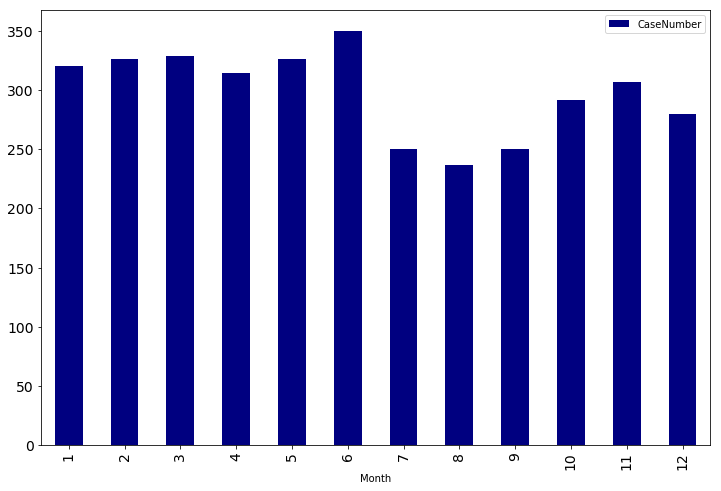

In [16]:
death_month.plot(kind='bar',
                   figsize=(12,8),
                   legend=True,
                   color=['navy'],
                   fontsize=14)
pp.show()

In [17]:
#deterine the day of the month with the highest deaths
death_day = death_index.groupby(['Day']).count()
print (death_day)

     CaseNumber  Month  Year  Sex  Race  Age  ResidenceCity  ResidenceCounty  \
Day                                                                            
1           117    117   117  117   117  117            113               91   
2           137    137   137  137   137  137            135              114   
3           125    125   125  125   124  125            120              103   
4           135    135   135  135   135  135            131              106   
5           131    131   131  131   131  131            124              108   
6           120    120   120  120   120  120            117              100   
7           111    111   111  111   111  111            109               90   
8           119    119   119  119   119  119            119               99   
9           130    130   130  130   130  130            125              103   
10          107    107   107  107   107  107            106               86   
11          124    124   124  124   124 

In [18]:
death_day = death_day.drop(['Month','Year','Sex','Race','Age','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid','Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis= 1)
print(death_day)

     CaseNumber
Day            
1           117
2           137
3           125
4           135
5           131
6           120
7           111
8           119
9           130
10          107
11          124
12          116
13          119
14          121
15           86
16          112
17          130
18          123
19          108
20          110
21          108
22          110
23          120
24          121
25          114
26          116
27          114
28          101
29          102
30          114
31           80


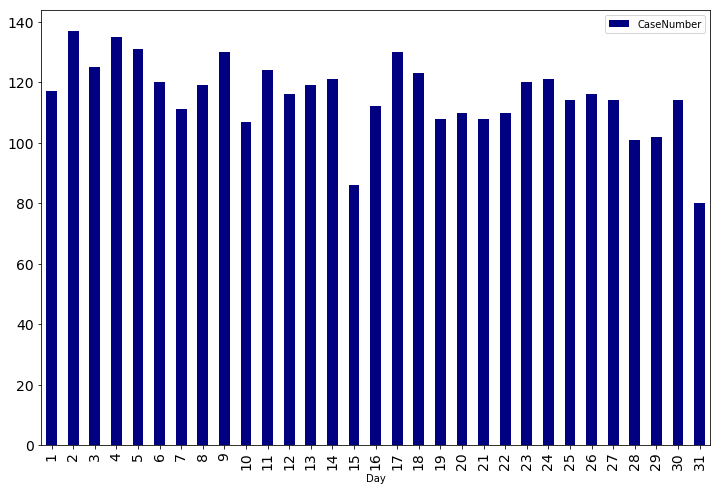

In [19]:
death_day.plot(kind='bar',
                   figsize=(12,8),
                   legend=True,
                   color=['navy'],
                   fontsize=14)
pp.show()

In [20]:
#deterine the gender of the deaths
death_sex = death_index.groupby(['Sex']).count()
print (death_sex)

        CaseNumber   Day  Month  Year  Race   Age  ResidenceCity  \
Sex                                                                
Female         970   970    970   970   966   970            952   
Male          2609  2609   2609  2609  2605  2609           2537   

        ResidenceCounty  DeathCity  DeathCounty     ...      Oxymorphone  \
Sex                                                 ...                    
Female              773        970          655     ...               31   
Male               2111       2608         1750     ...               64   

        EtOH  Hydrocodone  Benzodiazepine  Methadone  Amphet  Tramad  \
Sex                                                                    
Female   173           45             309        122      30      26   
Male     599           52             574        214      51      53   

        Morphine (not heroin)  Other  Any Opioid  
Sex                                               
Female                     17  

In [21]:
death_sex = death_sex.drop(['Month','Year','Day','Race','Age','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid','Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis= 1)
print(death_sex)

        CaseNumber
Sex               
Female         970
Male          2609


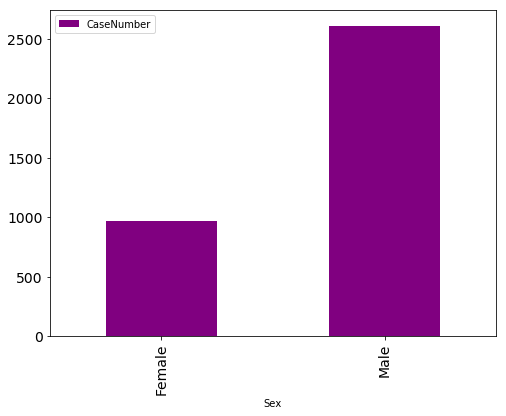

In [22]:
death_sex.plot(kind='bar',
                   figsize=(8,6),
                   legend=True,
                   color=['purple'],
                   fontsize=14)
pp.show()

In [23]:
#deterime the ethnicity of the deaths
death_race = death_index.groupby(['Race']).count()
print (death_race)

                        CaseNumber   Day  Month  Year   Sex   Age  \
Race                                                                
Asian Indian                     6     6      6     6     6     6   
Asian, Other                    13    13     13    13    13    13   
Black                          284   284    284   284   284   284   
Chinese                          2     2      2     2     2     2   
Hawaiian                         1     1      1     1     1     1   
Hispanic, Black                 11    11     11    11    11    11   
Hispanic, White                382   382    382   382   381   382   
Native American, Other           1     1      1     1     1     1   
Other                            6     6      6     6     6     6   
Unknown                         14    14     14    14    14    14   
White                         2852  2852   2852  2852  2852  2852   

                        ResidenceCity  ResidenceCounty  DeathCity  \
Race                             

In [24]:
death_race = death_race.drop(['Month','Year','Day','Sex','Age','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid','Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis= 1)
print(death_race)

                        CaseNumber
Race                              
Asian Indian                     6
Asian, Other                    13
Black                          284
Chinese                          2
Hawaiian                         1
Hispanic, Black                 11
Hispanic, White                382
Native American, Other           1
Other                            6
Unknown                         14
White                         2852


In [25]:
death_race = death_race.sort_values(by=['CaseNumber'], ascending=False)
print(death_race)

                        CaseNumber
Race                              
White                         2852
Hispanic, White                382
Black                          284
Unknown                         14
Asian, Other                    13
Hispanic, Black                 11
Asian Indian                     6
Other                            6
Chinese                          2
Hawaiian                         1
Native American, Other           1


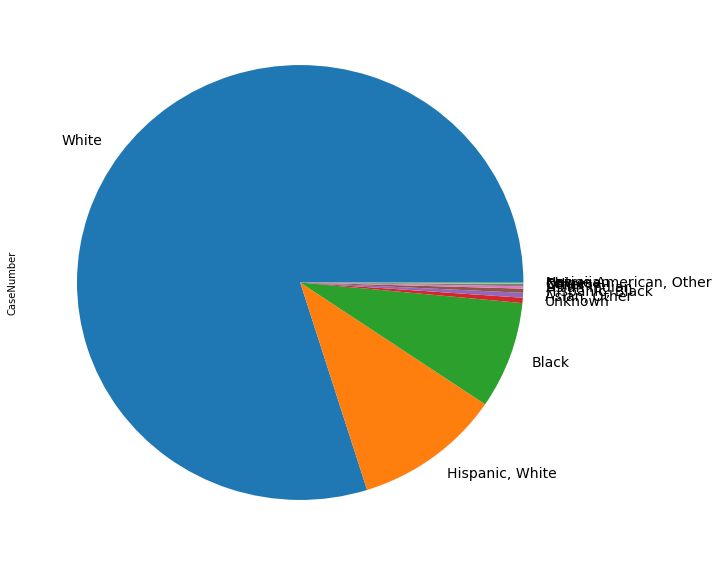

In [26]:
death_race.plot(kind='pie',
                   figsize=(10,10),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()

In [28]:
# import 2016 demographic statistics for Conecticut
CTdem = pd.read_csv('/Users/rachela054/Documents/Into to Data Mining/project 2/Datasets/2016_State-level_ASRH.csv')
CTdem.tail()

,Age Group,Mwhite,Fwhite,MBLack,Fblack,MAIndian,FAIndian,Masian,Fasian,Non-Hisp All Races,MWhite,FWhite,HMBlack,HFBlack,HMAIndian,HFAindian,HMAsian,HFAsian,Hispanic All Race,Total
15,70-74 yrs,"53,058","60,939","3,939","5,703",115,129,"1,614","1,872","127,369","3,175","4,161",256,421,63,91,48,44,"8,259","135,628"
16,75-79 yrs,"34,711","43,930","2,615","4,174",89,76,"1,291","1,196","88,082","1,942","2,806",181,279,41,50,30,32,"5,361","93,443"
17,80-84 yrs,"24,851","35,848","1,540","2,868",39,67,649,780,"66,642","1,178","1,886",117,160,15,37,11,18,"3,422","70,064"
18,85+ yrs,"27,246","54,133","1,275","2,871",50,88,401,672,"86,736","1,057","1,823",83,136,32,33,11,17,"3,192","89,928"
19,All,"1,194,778","1,256,560","182,771","198,476","4,792","4,811","83,010","88,906","3,014,104","236,383","236,553","32,776","35,592","6,790","6,270","4,315","3,669","562,348","3,576,452"


In [29]:
CTdem = CTdem.set_index(['Age Group'])

In [30]:
#use the data from CTdem to create new datafrome to show connecticut's demographics
D_race = {'Race': ['White', 'Hispanic, White', 'Black', 'Asian', 'Hispanic, Black', 'Other'], 'Number': [1194778+1256560, 236383+236553, 182771+198476, 83010+88906, 32776+35592, 3576452 - (1194778+1256560+236383+236553+182771+198476+83010+88906+32776+35592)]}
CTdem_race = pd.DataFrame(data=D_race)
CTdem_race = CTdem_race.set_index(['Race'])
print(CTdem_race)

                  Number
Race                    
White            2451338
Hispanic, White   472936
Black             381247
Asian             171916
Hispanic, Black    68368
Other              30647


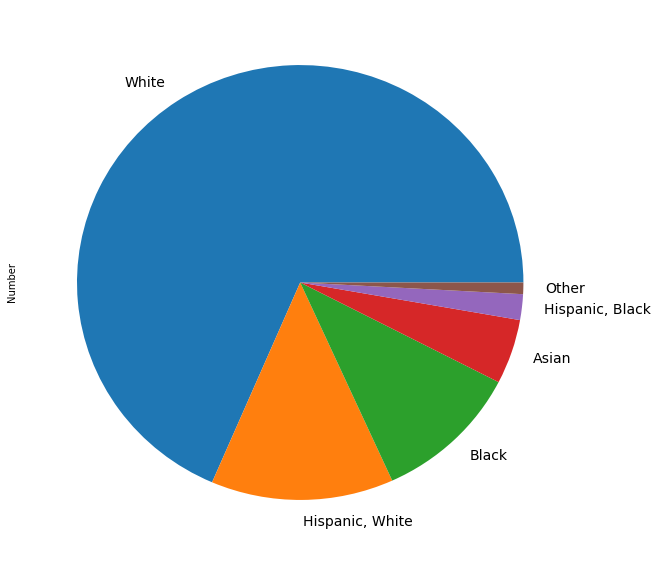

In [31]:
CTdem_race.plot(kind='pie',
                   figsize=(10,10),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()

In [32]:
#determine the age breakdown of the deaths
death_age = death_index.groupby(['Age']).count()
print (death_age)

      CaseNumber  Day  Month  Year  Sex  Race  ResidenceCity  ResidenceCounty  \
Age                                                                             
14.0           1    1      1     1    1     1              1                0   
16.0           1    1      1     1    1     1              1                1   
17.0           7    7      7     7    7     7              7                6   
18.0          13   13     13    13   13    13             13               11   
19.0          20   20     20    20   20    20             20               17   
20.0          29   29     29    29   29    29             28               24   
21.0          38   38     38    38   38    38             37               32   
22.0          51   51     51    51   51    51             49               41   
23.0          59   59     59    59   59    59             58               48   
24.0          70   70     70    70   70    70             69               56   
25.0          71   71     71

In [33]:
death_age = death_age.drop(['Month','Year','Day','Sex','Race','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid','Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis= 1)
print(death_age)

      CaseNumber
Age             
14.0           1
16.0           1
17.0           7
18.0          13
19.0          20
20.0          29
21.0          38
22.0          51
23.0          59
24.0          70
25.0          71
26.0          95
27.0          68
28.0          92
29.0         105
30.0          86
31.0          81
32.0          74
33.0          98
34.0          87
35.0          97
36.0          83
37.0          81
38.0          79
39.0          77
40.0          80
41.0          81
42.0          63
43.0          83
44.0         104
...          ...
47.0          93
48.0          95
49.0         108
50.0         104
51.0         108
52.0          93
53.0          83
54.0         104
55.0          91
56.0          79
57.0          74
58.0          80
59.0          61
60.0          49
61.0          42
62.0          35
63.0          28
64.0          19
65.0          14
66.0          16
67.0           9
68.0           7
69.0           4
70.0           7
71.0           8
72.0          

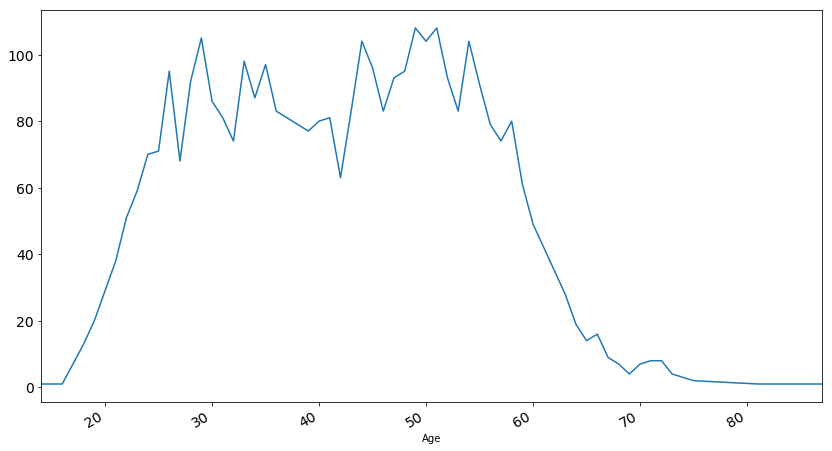

In [34]:
death_age.plot(kind='line',
                   figsize=(14,8),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()

In [35]:
#where do the the people who overdose live
death_county = death_index.groupby(['ResidenceCounty']).count()
print (death_county)

                     CaseNumber  Day  Month  Year  Sex  Race  Age  \
ResidenceCounty                                                     
AROOSTOOK                     1    1      1     1    1     1    1   
BERKSHIRE                     1    1      1     1    1     1    1   
CHESAPEAKE CITY               1    1      1     1    1     1    1   
COLLIER                       1    1      1     1    1     1    1   
COOK                          1    1      1     1    1     1    1   
CUMBERLAND                    1    1      1     1    1     1    1   
CUYAHOGA                      1    1      1     1    1     1    1   
DAKOTA                        1    1      1     1    1     1    1   
DUTCHESS                      8    8      8     8    8     8    8   
ESSEX                         5    5      5     5    5     5    5   
FAIRFIELD                   454  454    454   454  454   454  454   
FRANKLIN                      1    1      1     1    1     1    1   
GLOUCESTER                    1   

In [36]:
death_county = death_county.sort_values(by=['CaseNumber'], ascending=False)

In [37]:
death_county = death_county.head(6)
death_county.head(6)

,CaseNumber,Day,Month,Year,Sex,Race,Age,ResidenceCity,DeathCity,DeathCounty,...,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid
ResidenceCounty,,,,,,,,,,,,,,,,,,,,,
HARTFORD,784,784,784,784,783,782,784,784,784,498,...,15,166,22,162,50,11,16,11,62,187
NEW HAVEN,757,757,757,757,757,756,757,757,757,512,...,16,147,16,210,106,19,16,16,67,181
FAIRFIELD,454,454,454,454,454,454,454,454,453,311,...,12,119,14,132,53,16,6,4,36,99
NEW LONDON,284,284,284,284,284,284,284,284,284,190,...,7,51,14,58,16,3,6,3,30,57
LITCHFIELD,175,175,175,175,175,174,175,175,175,124,...,5,35,5,36,13,4,5,5,17,49
MIDDLESEX,134,134,134,134,134,134,134,134,134,94,...,5,25,3,33,10,1,3,2,10,35


In [38]:
death_county = death_county.drop(['Day','Month','Year','Day','Sex','Race','ResidenceCity', 'DeathCity','DeathCounty','Oxymorphone', 'EtOH', 'Hydrocodone','Benzodiazepine','Methadone','Amphet', 'Morphine (not heroin)', 'Tramad','Any Opioid','Location','InjuryPlace','Heroin','Cocaine','Fentanyl','Oxycodone', 'Other'], axis= 1)
print(death_county)

                 CaseNumber  Age
ResidenceCounty                 
HARTFORD                784  784
NEW HAVEN               757  757
FAIRFIELD               454  454
NEW LONDON              284  284
LITCHFIELD              175  175
MIDDLESEX               134  134


In [39]:
death_county = death_county.drop(['Age'], axis=1)

In [40]:
death_county.head(6)

,CaseNumber
ResidenceCounty,
HARTFORD,784
NEW HAVEN,757
FAIRFIELD,454
NEW LONDON,284
LITCHFIELD,175
MIDDLESEX,134


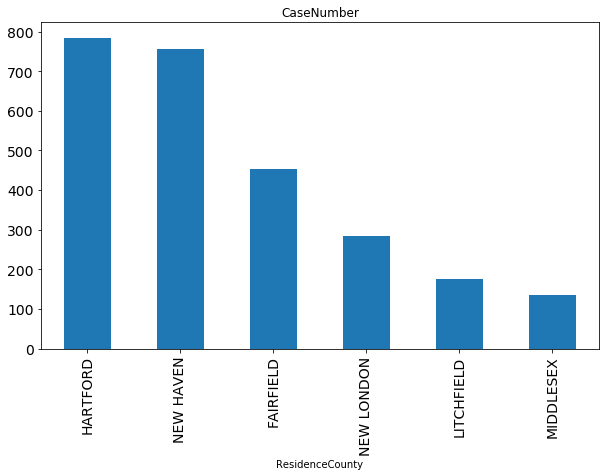

In [41]:
death_county.plot(kind='bar',
                   figsize=(10,6),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()

In [42]:
#determine the thw most frequent opioid in overdoes victims
death_type = death_index

In [43]:
death_type['Cocaine'].replace('Y', 1 ,inplace=True)
death_type['Heroin'].replace('Y', 1 ,inplace=True)
death_type['Fentanyl'].replace('Y', 1 ,inplace=True)
death_type['Oxycodone'].replace('Y', 1 ,inplace=True)
death_type['EtOH'].replace('Y', 1 ,inplace=True)
death_type['Hydrocodone'].replace('Y', 1 ,inplace=True)
death_type['Benzodiazepine'].replace('Y', 1 ,inplace=True)
death_type['Methadone'].replace('Y', 1 ,inplace=True)
death_type['Amphet'].replace('Y', 1 ,inplace=True)
death_type['Tramad'].replace('Y', 1 ,inplace=True)
death_type['Morphine (not heroin)'].replace('Y', 1 ,inplace=True)

death_type = death_type.drop(['Month','Year','Day','Sex','Race','ResidenceCity', 'ResidenceCounty', 'DeathCity','DeathCounty','Oxymorphone','Location','InjuryPlace', 'Any Opioid', 'Other', 'Age'], axis= 1)
death_type = death_type.fillna(0)

death_type.head(30)

,CaseNumber,Heroin,Cocaine,Fentanyl,Oxycodone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin)
Date,,,,,,,,,,,,
12/29/2012,12-18447,0,1,0,1,0,0,0,0,0.0,0.0,0
10/18/2012,12-14640,1,0,0,0,0,0,1,0,0.0,0.0,0
5/30/2012,21885,1,0,0,0,0,0,0,0,0.0,0.0,0
6/21/2012,20424,1,0,0,0,0,0,0,0,0.0,0.0,0
5/24/2012,23346,1,0,0,0,0,0,0,0,0.0,0.0,0
8/27/2012,12-12055,0,1,0,0,0,0,0,0,0.0,0.0,0
8/15/2012,12-11530,1,0,0,0,0,0,0,0,0.0,0.0,0
9/30/2012,12-13673,1,1,0,0,0,0,0,0,0.0,0.0,0
8/18/2012,12-11672,1,0,0,0,0,0,0,0,0.0,0.0,0


In [44]:
death_type.Heroin.unique()

array([0, 1, 'y', ' '], dtype=object)

In [45]:
death_type['Cocaine'].replace('y', 1 ,inplace=True)
death_type['Heroin'].replace('y', 1 ,inplace=True)
death_type['Fentanyl'].replace('y', 1 ,inplace=True)
death_type['Oxycodone'].replace('y', 1 ,inplace=True)
death_type['EtOH'].replace('y', 1 ,inplace=True)
death_type['Hydrocodone'].replace('y', 1 ,inplace=True)
death_type['Benzodiazepine'].replace('y', 1 ,inplace=True)
death_type['Methadone'].replace('y', 1 ,inplace=True)
death_type['Amphet'].replace('y', 1 ,inplace=True)
death_type['Tramad'].replace('y', 1 ,inplace=True)
death_type['Morphine (not heroin)'].replace('y', 1 ,inplace=True)

death_type['Cocaine'].replace(' ', 0 ,inplace=True)
death_type['Heroin'].replace(' ', 0 ,inplace=True)
death_type['Fentanyl'].replace(' ', 0 ,inplace=True)
death_type['Oxycodone'].replace(' ', 0 ,inplace=True)
death_type['EtOH'].replace(' ', 0 ,inplace=True)
death_type['Hydrocodone'].replace(' ', 0 ,inplace=True)
death_type['Benzodiazepine'].replace(' ', 0 ,inplace=True)
death_type['Methadone'].replace(' ', 0 ,inplace=True)
death_type['Amphet'].replace(' ', 0 ,inplace=True)
death_type['Tramad'].replace(' ', 0 ,inplace=True)
death_type['Morphine (not heroin)'].replace(' ', 0 ,inplace=True)

death_type.head()

,CaseNumber,Heroin,Cocaine,Fentanyl,Oxycodone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin)
Date,,,,,,,,,,,,
12/29/2012,12-18447,0,1,0,1,0,0,0,0,0.0,0.0,0
10/18/2012,12-14640,1,0,0,0,0,0,1,0,0.0,0.0,0
5/30/2012,21885,1,0,0,0,0,0,0,0,0.0,0.0,0
6/21/2012,20424,1,0,0,0,0,0,0,0,0.0,0.0,0
5/24/2012,23346,1,0,0,0,0,0,0,0,0.0,0.0,0


In [46]:
Heroin = death_type['Heroin'].sum()
print(Heroin)
Cocaine = death_type['Cocaine'].sum()
print(Cocaine)

1933
997


In [47]:
death_type.Fentanyl.unique()

array([0, 1, 'Y POPS', 'Y (PTCH)', 'Y-A'], dtype=object)

In [48]:
death_type['Fentanyl'].replace('Y POPS', 1 ,inplace=True)
death_type['Fentanyl'].replace('Y (PTCH)', 1 ,inplace=True)
death_type['Fentanyl'].replace('Y-A', 1 ,inplace=True)

In [49]:
Fentanyl = death_type['Fentanyl'].sum()
print(Fentanyl)
Oxycodone = death_type['Oxycodone'].sum()
print(Oxycodone)
EtOH = death_type['EtOH'].sum()
print(EtOH)
Hydrocodone = death_type['Hydrocodone'].sum()
print(Hydrocodone)
Benzodiazepine = death_type['Benzodiazepine'].sum()
print(Benzodiazepine)
Methadone = death_type['Methadone'].sum()
print(Methadone)
Amphet = death_type['Amphet'].sum()
print(Amphet)
Tramad = death_type['Tramad'].sum()
print(Tramad)

1114
491
772
98
884
336
81.0
79.0


In [50]:
death_type['Morphine (not heroin)'].unique()

array([0, 1, 'NO RX BUT STRAWS', 'STOLE MEDS', 'PCP neg', ' Y'], dtype=object)

In [51]:
death_type['Morphine (not heroin)'].replace('NO RX BUT STRAWS', 1 ,inplace=True)
death_type['Morphine (not heroin)'].replace('STOLE MEDS', 1 ,inplace=True)
death_type['Morphine (not heroin)'].replace('PCP neg', 1 ,inplace=True)
death_type['Morphine (not heroin)'].replace(' Y', 1 ,inplace=True)

In [52]:
Morphine = death_type['Morphine (not heroin)'].sum()
print(Morphine)

32


In [53]:
death_typetotal = pd.DataFrame({'Opioid': ['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine (not heroin)'],
                   'Number of Deaths': [1933, 997, 1114, 491, 772, 98, 884, 336, 81, 79, 32],
                   })
print(death_typetotal)

    Number of Deaths                 Opioid
0               1933                 Heroin
1                997                Cocaine
2               1114               Fentanyl
3                491              Oxycodone
4                772                   EtOH
5                 98            Hydrocodone
6                884         Benzodiazepine
7                336              Methadone
8                 81                 Amphet
9                 79                 Tramad
10                32  Morphine (not heroin)


In [54]:
death_typetotal = death_typetotal.set_index(['Opioid'])

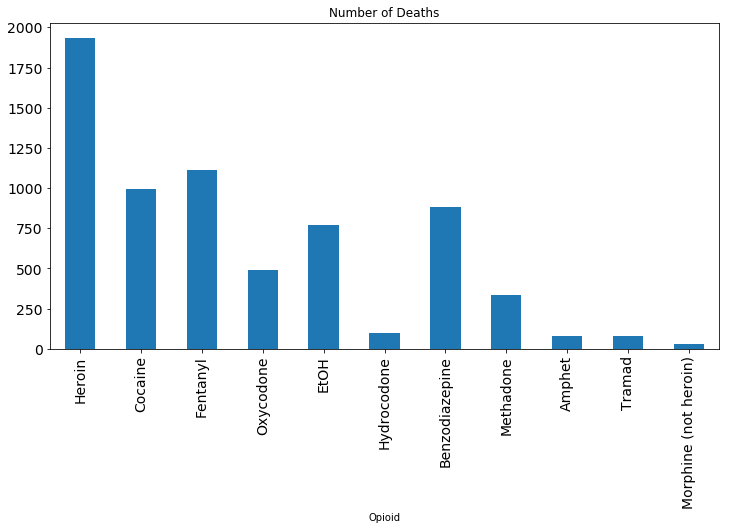

In [55]:
death_typetotal.plot(kind='bar',
                   figsize=(12,6),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()

In [56]:
#are heroin overdoses increacing or decreasing? 
death_heroin = death_index.drop(['Day','Month','Sex','Race','Age','ResidenceCity','ResidenceCounty','DeathCity', 'DeathCounty','Location','InjuryPlace','Cocaine','Fentanyl',
 'Oxycodone','Oxymorphone','EtOH','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine (not heroin)','Other',
 'Any Opioid'], axis= 1)
death_heroin.head()

,CaseNumber,Year,Heroin
Date,,,
12/29/2012,12-18447,2012,NaN
10/18/2012,12-14640,2012,1
5/30/2012,21885,2012,1
6/21/2012,20424,2012,1
5/24/2012,23346,2012,1


In [57]:
death_heroin['Heroin'].replace('Y', 1 ,inplace=True)
death_heroin['Heroin'].replace('y', 1 ,inplace=True)
death_heroin['Heroin'].replace(' ', 0 ,inplace=True)
death_heroin['Heroin'].replace(' nan', 0 ,inplace=True)
death_heroin['Heroin'].unique()

array([ nan,   1.,   0.])

In [58]:
death_heroin = death_heroin[death_heroin.Heroin == 1]
death_heroin.head(10)

,CaseNumber,Year,Heroin
Date,,,
10/18/2012,12-14640,2012,1.0
5/30/2012,21885,2012,1.0
6/21/2012,20424,2012,1.0
5/24/2012,23346,2012,1.0
8/15/2012,12-11530,2012,1.0
9/30/2012,12-13673,2012,1.0
8/18/2012,12-11672,2012,1.0
3/23/2012,19694,2012,1.0
7/15/2012,12-10000,2012,1.0


In [59]:
death_heroin = death_heroin.groupby(['Year']).count()
print (death_heroin)

      CaseNumber  Heroin
Year                    
2012         174     174
2013         257     257
2014         325     325
2015         415     415
2016         504     504
2017         258     258


In [60]:
death_heroin = death_heroin.drop(['CaseNumber'], axis=1)

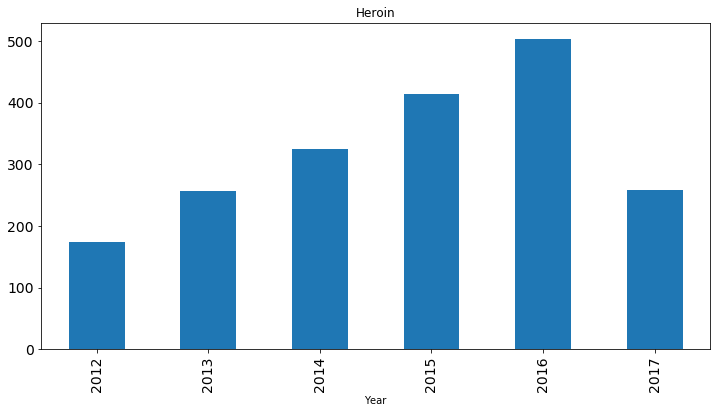

In [61]:
death_heroin.plot(kind='bar',
                   figsize=(12,6),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()

In [62]:
#find trenads in Fentanyl usage
death_Fentanyl = death_index.drop(['Day','Month','Sex','Race','Age','ResidenceCity','ResidenceCounty','DeathCity', 'DeathCounty','Location','InjuryPlace','Cocaine','Heroin',
 'Oxycodone','Oxymorphone','EtOH','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine (not heroin)','Other',
 'Any Opioid'], axis= 1)
death_Fentanyl.head()

,CaseNumber,Year,Fentanyl
Date,,,
12/29/2012,12-18447,2012,NaN
10/18/2012,12-14640,2012,NaN
5/30/2012,21885,2012,NaN
6/21/2012,20424,2012,NaN
5/24/2012,23346,2012,NaN


In [63]:
death_Fentanyl['Fentanyl'].unique()

array([nan, 1, 'Y POPS', 'Y (PTCH)', 'Y-A', 'y'], dtype=object)

In [64]:
death_Fentanyl['Fentanyl'].replace('Y', 1 ,inplace=True)
death_Fentanyl['Fentanyl'].replace('y', 1 ,inplace=True)
death_Fentanyl['Fentanyl'].replace('Y POPS', 1 ,inplace=True)
death_Fentanyl['Fentanyl'].replace('Y (PTCH)', 1 ,inplace=True)
death_Fentanyl['Fentanyl'].replace('Y-A', 0 ,inplace=True)

death_Fentanyl.head()

,CaseNumber,Year,Fentanyl
Date,,,
12/29/2012,12-18447,2012,NaN
10/18/2012,12-14640,2012,NaN
5/30/2012,21885,2012,NaN
6/21/2012,20424,2012,NaN
5/24/2012,23346,2012,NaN


In [65]:
death_Fentanyl = death_Fentanyl.dropna(subset=['Fentanyl'])
death_Fentanyl.head()

,CaseNumber,Year,Fentanyl
Date,,,
6/20/2012,43085,2012,1.0
11/25/2012,12-16579,2012,1.0
11/30/2012,12-16897,2012,1.0
7/3/2012,17137,2012,1.0
10/9/2012,12-14100,2012,1.0


In [66]:
death_Fentanyl = death_Fentanyl.groupby(['Year']).count()
print (death_Fentanyl)

      CaseNumber  Fentanyl
Year                      
2012          14        14
2013          37        37
2014          75        75
2015         186       186
2016         479       479
2017         323       323


In [67]:
death_Fentanyl = death_Fentanyl.drop(['CaseNumber'], axis=1)

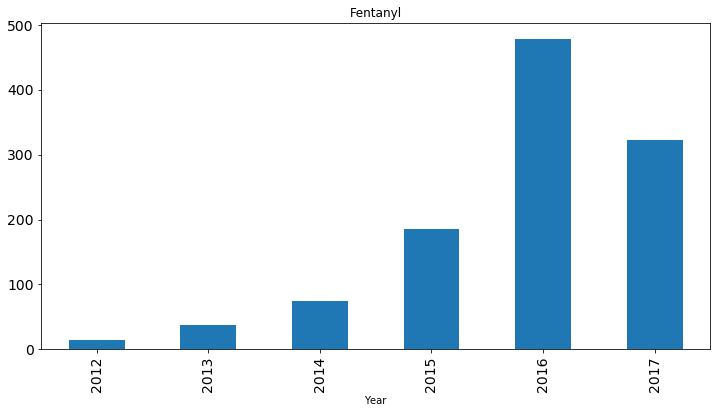

In [68]:
death_Fentanyl.plot(kind='bar',
                   figsize=(12,6),
                   legend=False,
                   fontsize=14,
                   subplots=True)
pp.show()